In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r"D:\USM\Semester 1\ML\ml ass 2\drug_3.csv")

In [ ]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Benzos,Amphet
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,1,1
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,1
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


|Demographic features     |Personality measurement features | Targets|
|---|---|---|
|Age | Nscore|  Cannabis	|
|Gender |  Escore| Benzos|
|Education|  Oscore| Amphet|
| Country          |          score|  |
|Ethnicity                    |        Cscore|  
|     |    Impulsive       |     |      
|     |  SS|       | 

In [ ]:
df.shape

(1885, 15)

# all the dataset are numerical data type
the 3 class labels are int64

the ID is also int64

13 features are float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Cannabis   1885 non-null   int64  
 13  Benzos     1885 non-null   int64  
 14  Amphet     1885 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 221.0 KB


# the dataset is clean no missing values is observed 

In [ ]:
df.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Cannabis     0
Benzos       0
Amphet       0
dtype: int64

In [ ]:
#droping the ID attribute since it is not relevent to our goal 
df = df.drop(columns=['ID'], axis=0)

In [ ]:
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Benzos,Amphet
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,0.671088,0.407958,0.360212
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,0.469943,0.491586,0.480189
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000,0.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000,0.000000,0.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000,1.000000,1.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000,1.000000,1.000000


# Observed correlations between features 
1. negative correlation of -0.44 between age and cannabis
2. negative correlation of -0.46 between country and cannabis
3. negative correlation of -0.43 between Escore and Nscore
4. positive correlation of 0.42 between ss and Oscore
5. strong positive correlation of 0.62 between ss and impulsive
6.positive correlation of 0.47 between cannabis and Amphet
7. positive correlation of 0.42 between Benzos and Amphet

<AxesSubplot:>

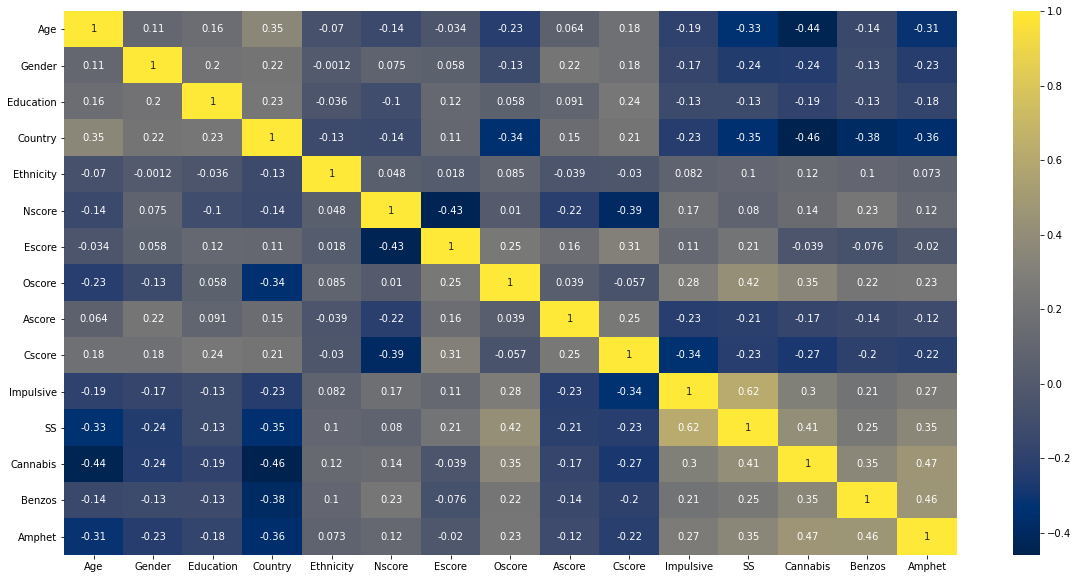

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr()  ,annot = True , cmap="cividis")

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Cannabis',
       'Benzos', 'Amphet'],
      dtype='object')

# Slitting the dataset into feature and target 

In [ ]:
features = df.drop(["Cannabis","Benzos","Amphet"], axis=1)
target=df[["Cannabis","Benzos","Amphet"]]

In [ ]:
features.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


# Normalizing the the features
we have used the dataset for clustering without normalizing the features then we obtain high valua of Inertia (sum of square distance) then we decided to normalize the features and we obtained small value of 
Inertia (sum of square distance) so we will be using the normalized features dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_name = features.columns 
df_norm = scaler.fit_transform(features) 

In [ ]:
df_norm = pd.DataFrame(df_norm, columns=features_name)
df_norm.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.409137,1.0,0.537681,1.0,0.409061,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.246475,0.0,1.000000,1.0,0.262143,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.409137,0.0,0.537681,1.0,0.262143,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.000000,1.0,0.814329,1.0,0.262143,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.409137,1.0,1.000000,1.0,0.262143,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658


# Part 1: Using Personality Measurement Features For K-means Clustering 

# Using Nscore and Escore for clustering   
cluster, k = 2

Inertia (sum of square distance)=   46.29599522657239 this value is the best and minimun value observed out of all the experiments. 

## cluster intrepretation  
cluster 0 : are the cluster observed having high Nscore and low Escore

cluster 1 : are the cluster observed having  high Escore and low Nscore

In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Escore","Nscore"]]
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=540)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [0 1 1 ... 0 0 1]
The Inertia (sum of square distance) is:  46.29599522657239


<AxesSubplot:xlabel='Escore', ylabel='Nscore'>

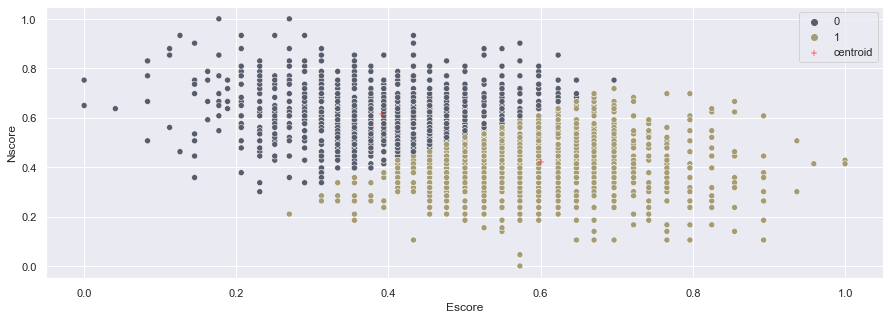

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Escore"], y=data["Nscore"], hue=kmeans.labels_ , palette="cividis")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='blue',marker='+',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1] ,color='red',marker='+',label='centroid')

# Using Oscore and 	Ascore for clustering 

cluster, k = 2

Inertia (sum of square distance)=   56.66766326851086

## cluster intrepretation  
cluster 0 : are the cluster observed having high Oscore 

cluster 1 : are the cluster observed having  law Oscore 

In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Oscore","Ascore"]]
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=1)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [0 1 0 ... 0 1 1]
The Inertia (sum of square distance) is:  56.66766326851086


<AxesSubplot:xlabel='Oscore', ylabel='Ascore'>

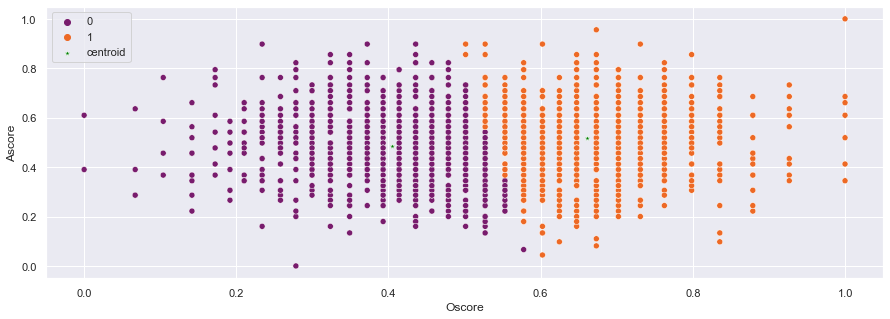

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Oscore"], y=data["Ascore"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='green',marker='*',label='centroid')

# Using Cscore and SS for clustering
cluster, k = 2

Inertia (sum of square distance)=   73.9741737525426
## cluster intrepretation  
cluster 0 : are the cluster observed having low SS

cluster 1 : are the cluster observed having  high SS

In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Cscore","SS"]]
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=540)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_


The clusters are:  [0 0 1 ... 0 1 1]
The Inertia (sum of square distance) is:  73.9741737525426


<AxesSubplot:xlabel='SS', ylabel='Cscore'>

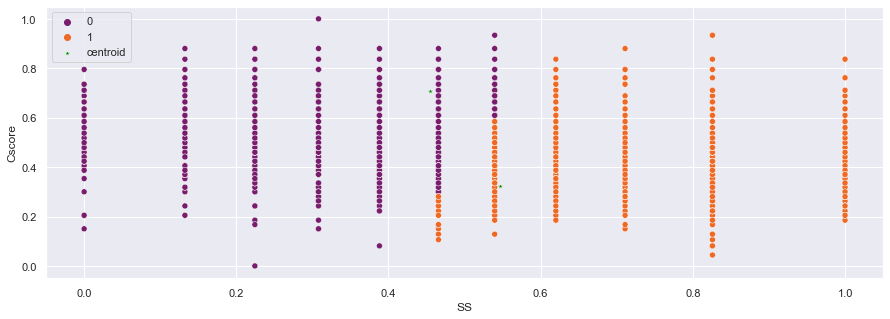

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["SS"], y=data["Cscore"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='GREEN',marker='*',label='centroid')

# Using Escore and Impulsive for clustering 
cluster, k = 2

Inertia (sum of square distance)=   61.90731043540112

## cluster intrepretation  
cluster 0 : are the cluster observed having low Impulsive

cluster 1 : are the cluster observed having  high Impulsive





In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Escore","Impulsive"]]
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=540)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_


The clusters are:  [0 0 0 ... 1 1 1]
The Inertia (sum of square distance) is:  61.90731043540112


<AxesSubplot:xlabel='Escore', ylabel='Impulsive'>

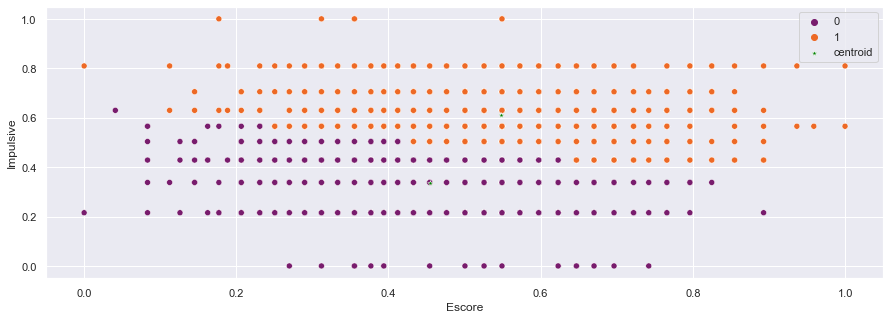

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Escore"], y=data["Impulsive"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='GREEN',marker='*',label='centroid')

# Part 2: Using Demographic Features For K-means Clustering 

# Using Age and Education for k-means clustering
cluster, k = 2

Inertia (sum of square distance)= 114.8007994154715

## cluster intrepretation
cluster 0 and cluster 1 : with the data points not clustered well, it is hard to
intrepret the clusters effectively.


In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Age","Education"]]
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_


The clusters are:  [0 0 0 ... 0 1 1]
The Inertia (sum of square distance) is:  114.8007994154715


<AxesSubplot:xlabel='Age', ylabel='Education'>

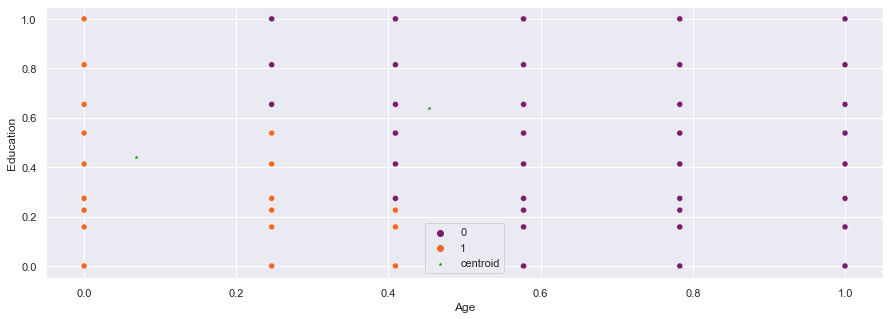

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Age"], y=data["Education"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='GREEN',marker='*',label='centroid')

# Using Gender and Education for k-means clustering
cluster, k = 2

Inertia (sum of square distance)=  83.66619760384013

## cluster intrepretation
cluster 0 and cluster 1 : with the data points not clustered well, it is hard to intrepret the clusters effectively.


In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Gender","Education"]]
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [1 0 0 ... 1 1 0]
The Inertia (sum of square distance) is:  83.66619760384013


<AxesSubplot:xlabel='Gender', ylabel='Education'>

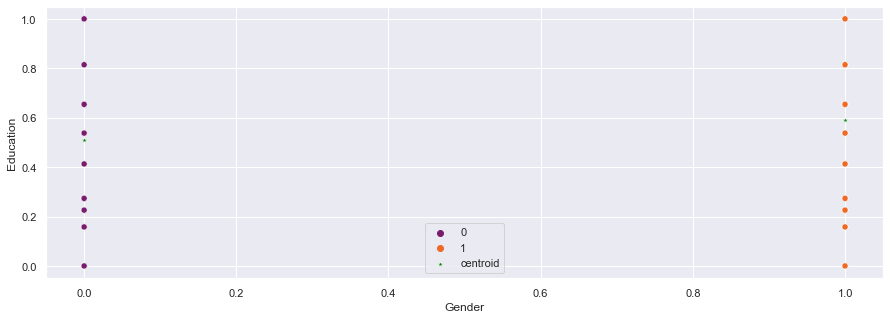

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Gender"], y=data["Education"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='GREEN',marker='*',label='centroid')

# Using Country and Age for clustering 
cluster, k = 2

Inertia (sum of square distance)= 127.37244230192292

## cluster intrepretation 
cluster 0 and cluster 1 : with the data points not clustered well, it is hard to intrepret the clusters effectively.

In [ ]:
from sklearn.cluster import KMeans
data = df_norm[["Age","Country"]]
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [0 0 0 ... 1 1 1]
The Inertia (sum of square distance) is:  127.37244230192292


<AxesSubplot:xlabel='Age', ylabel='Country'>

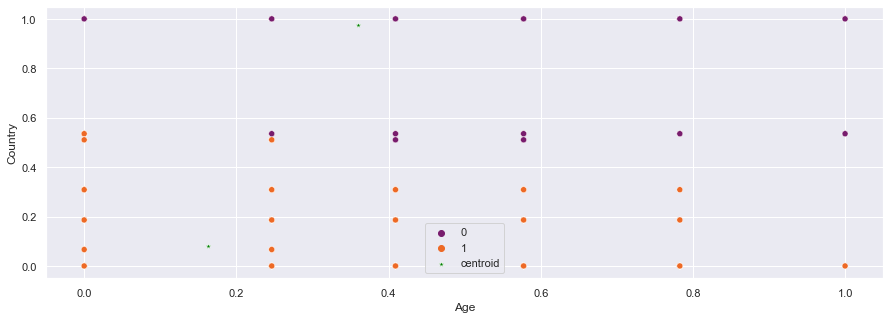

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=data["Age"], y=data["Country"], hue=kmeans.labels_ , palette="inferno")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],color='GREEN',marker='*',label='centroid')

# Splitting the features into demographic and personality measurement. 

In [ ]:
personality_measurements=df_norm[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
demographic_features=df_norm[['Age', 'Gender', 'Education', 'Country', 'Ethnicity']]

In [ ]:
personality_measurements.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658


In [ ]:
demographic_features.head()

,Age,Gender,Education,Country,Ethnicity
0,0.409137,1.0,0.537681,1.0,0.409061
1,0.246475,0.0,1.000000,1.0,0.262143
2,0.409137,0.0,0.537681,1.0,0.262143
3,0.000000,1.0,0.814329,1.0,0.262143
4,0.409137,1.0,1.000000,1.0,0.262143


# Using all demographic features for k-means clustering 
cluster, k = 2

Inertia (sum of square distance)=  579.5652569091603



In [ ]:
from sklearn.cluster import KMeans
data = demographic_features
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia (sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [1 0 0 ... 1 1 0]
The Inertia (sum of square distance) is:  579.5652569091603


# Using all personality measurement features for k-means clustering
cluster, k = 2

Inertia (sum of square distance)=   273.16269886221227

In [ ]:
from sklearn.cluster import KMeans
data = personality_measurements
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
kmeans = kmeans.fit(data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia(sum of square distance) is: ", kmeans.inertia_)
centroids = kmeans.cluster_centers_

The clusters are:  [0 0 0 ... 0 1 1]
The Inertia(sum of square distance) is:  273.16269886221227


# Results & Findings

In conclusion, the experiment was performed to determine relevant features between the personality measurements and demographic features, each by pairing of two features from the same category and by the overall category (personality measurements and demographics) features. 

It was observed that pair personality measurement features of Nscore and Escore have the lowest sum of square distance (inertia), while pair demographic features of Country and Age have the highest sum of square distance. Furthermore, all personality measurement features were observed to have a low sum of square distance of 237.2 and that of all demographic features to have a high sum of square distance of 579.6. 

With that, we can conclude that the personality measurement features are more relevant and play a major role in the clustering with good interpretation, while the demographic features are less relevant features that play a lesser role in the effective clustering.



# Inetria values of demogrphic and personality measurements
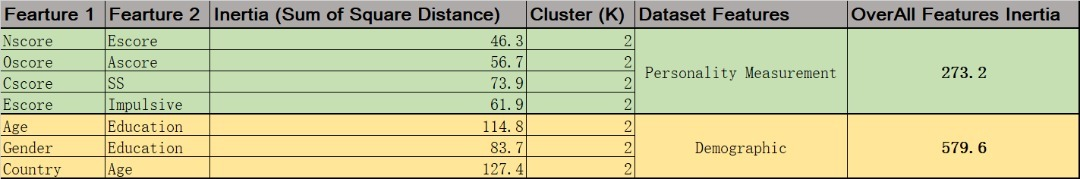